In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize']=[12,8]
sns.set_style('darkgrid')

C:\Users\hp\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
#Reading the dataset.
df=pd.read_csv("HR_Employee_Attrition_Data.csv")

# EDA

In [3]:
#Checking the top 5 data entries along with all the columns available.
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
#Checking the null values and dtype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [5]:
#Checking some basic statistical details.
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
#Setting EmployeeNumber as index.
df.set_index(['EmployeeNumber'], inplace = True)

In [7]:
#Checking Zero variance.
df[['EmployeeCount','StandardHours','Over18']].value_counts() 

EmployeeCount  StandardHours  Over18
1              80             Y         2940
dtype: int64

In [8]:
#Dropping the zero variance columns.
df.drop(['EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

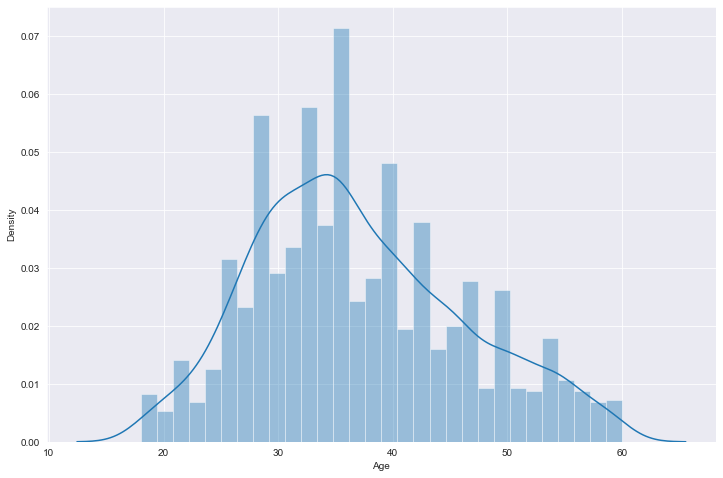

In [9]:
#Plotting distplot for Age column.
sns.distplot(df['Age'],bins=30,kde=True)

<AxesSubplot:xlabel='Age', ylabel='count'>

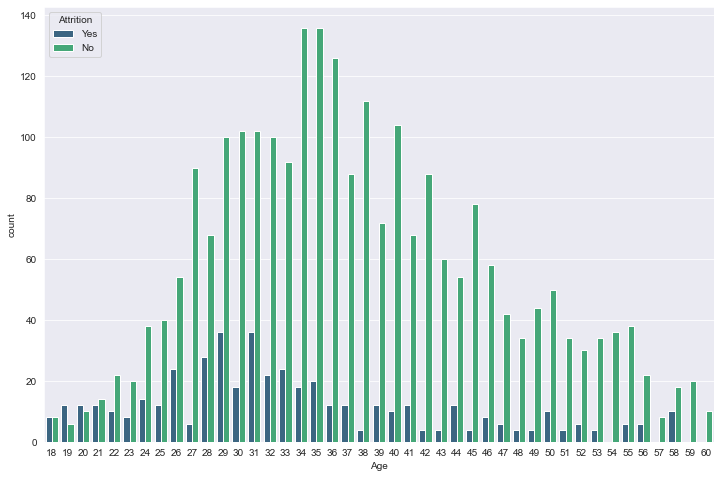

In [10]:
#Checking the relationship between the Age and Attrition.
sns.countplot(x='Age',data=df,hue='Attrition',palette='viridis')

#Insight - The employees within the range of 26-33 age group are having high attrition rate.

In [11]:
df['BusinessTravel'].value_counts()

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64

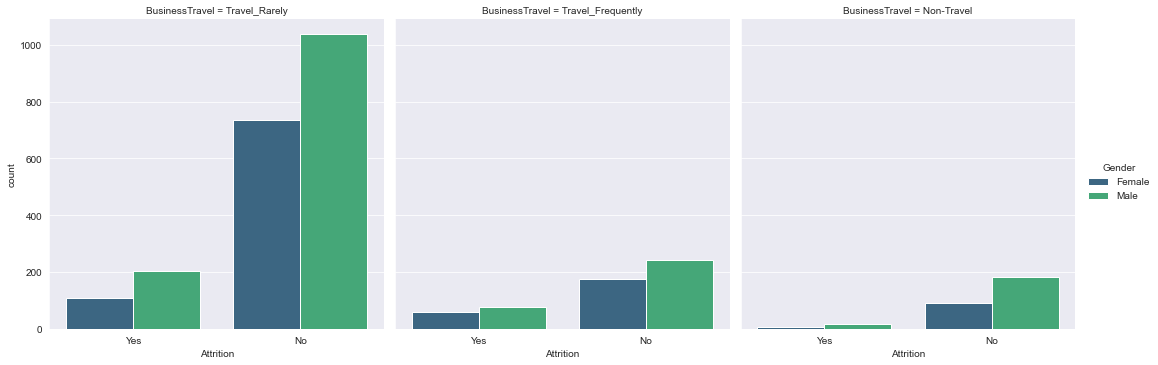

In [12]:
sns.factorplot(x='Attrition', col='BusinessTravel',hue='Gender',kind='count',data=df,palette='viridis');

#Insight - The employees who are travelling frequently are male and the attrition rate is also higher for them.

'Insight - Here we can say that the employees of "Research & Development" department travels frequently and hence the \nattrition is also more'

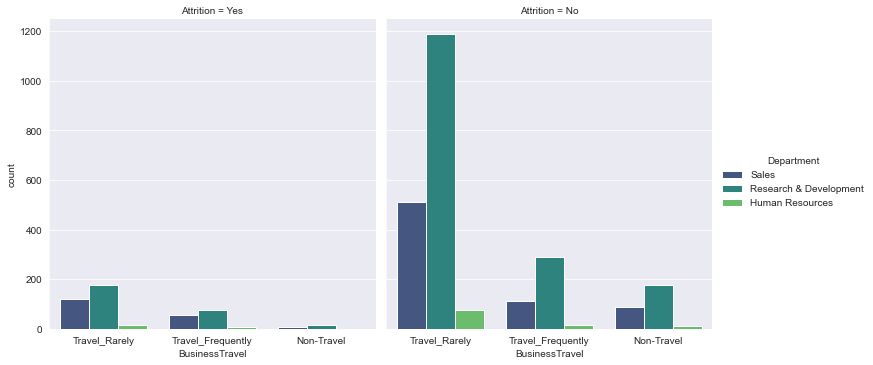

In [13]:
sns.factorplot(x='BusinessTravel', col='Attrition',hue='Department',kind='count',data=df,palette='viridis');

'''Insight - Here we can say that the employees of "Research & Development" department travels frequently and hence the 
attrition is also more'''

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

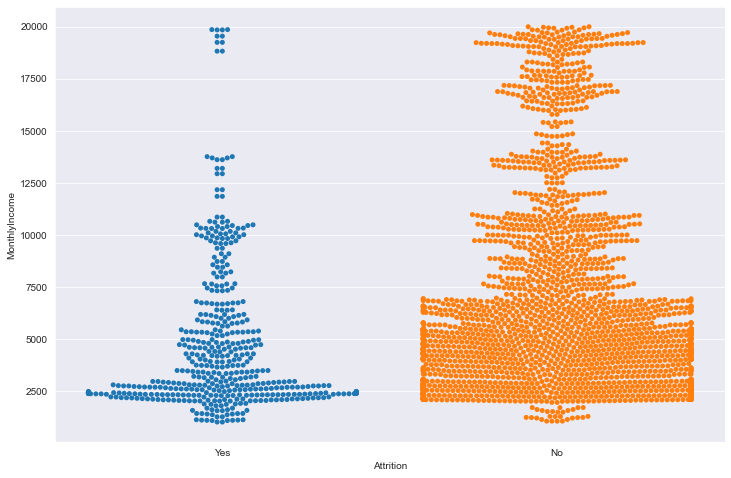

In [14]:
sns.swarmplot(x='Attrition',y='MonthlyIncome',data=df)

#Insight - The employees having monthly income around 2500 to 4000 shows high attrition.

<AxesSubplot:xlabel='JobSatisfaction', ylabel='PercentSalaryHike'>

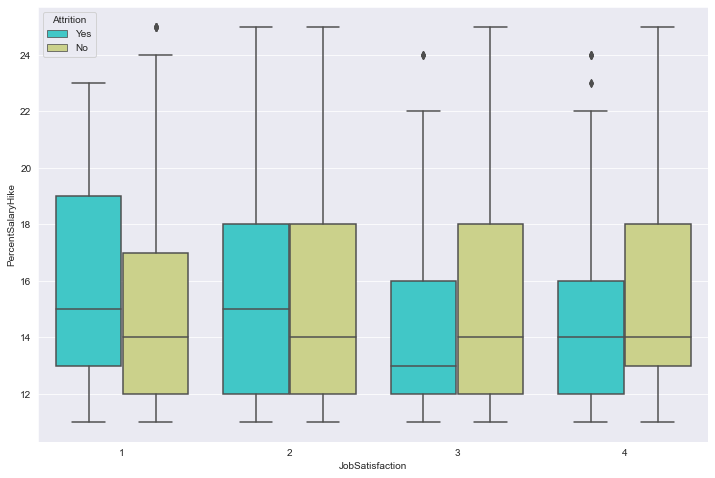

In [15]:
sns.boxplot(x='JobSatisfaction',y='PercentSalaryHike',data=df,hue='Attrition',palette='rainbow')

#Insight - The attrition is highest for the employees having job satisfaction=1.

<AxesSubplot:>

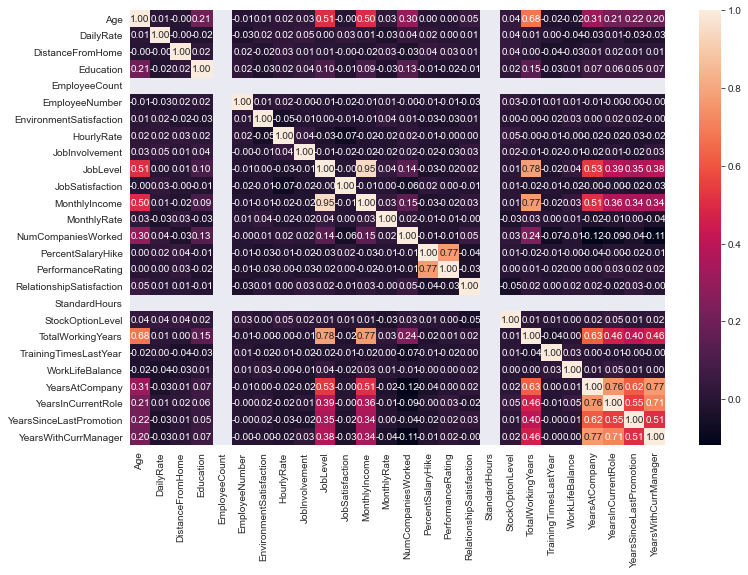

In [3]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [10]:
dummy_df=df

In [18]:
def correlation(data,value):
    new = set() 
    cor = data.corr()
    for i in range(len(cor.columns)):
        for j in range(i):
            if cor.iloc[i, j] > value:
                colname = cor.columns[i]  
                new.add(colname)
            elif (-cor.iloc[i,j]) > value:
                colname = cor.columns[i] 
                new.add(colname)
    return new

In [19]:
features = correlation(dummy_df, 0.75)
len(set(features))

5

In [20]:
features

{'MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

In [21]:
dummy_df.drop(features,axis=1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,19479,8,Yes,11,1,0,0,1,6,0
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,24907,1,No,23,4,1,3,3,10,1
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2396,6,Yes,15,2,0,3,3,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,23159,1,Yes,11,3,0,3,3,8,3
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,16632,9,No,12,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,12290,4,No,17,3,1,3,3,5,0
2937,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,21457,4,No,15,1,1,5,3,7,1
2938,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,5174,1,Yes,20,2,1,0,3,6,0


# Data Pre-Processing

In [11]:
def preprocessor(df):
    new_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    new_df['Attrition'] = le.fit_transform(new_df['Attrition'])
    new_df['BusinessTravel'] = le.fit_transform(new_df['BusinessTravel'])
    new_df['Department'] = le.fit_transform(new_df['Department'])
    new_df['EducationField'] = le.fit_transform(new_df['EducationField'])
    new_df['Gender'] = le.fit_transform(new_df['Gender'])
    new_df['JobRole'] = le.fit_transform(new_df['JobRole'])
    new_df['MaritalStatus'] = le.fit_transform(new_df['MaritalStatus'])
    new_df['OverTime'] = le.fit_transform(new_df['OverTime'])
    return new_df

In [12]:
encoded_df = preprocessor(dummy_df)

In [24]:
X = encoded_df.drop(['Attrition'],axis =1).values
y = encoded_df['Attrition'].values

# Split the data into Train-Test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)

# Build the Decision Tree Model

In [48]:
# Decision tree with depth = 16
model = DecisionTreeClassifier(random_state=4, max_depth=16) 
model.fit(X_train, y_train)

model_score_train = model.score(X_train, y_train)
print("Training score: ",model_score_train)

model_score_test = model.score(X_test, y_test)
print("Testing score: ",model_score_test)

Training score:  1.0
Testing score:  0.9659863945578231


In [49]:
y_pred=model.predict(X_test)

# Performance Metrics

In [50]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [52]:
# Model Accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9659863945578231


In [53]:
predictions = model.predict(X_test)
y_actual_result = y_test[0]
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

# Recall

In [54]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.9259259259259259


# Area Under the Curve

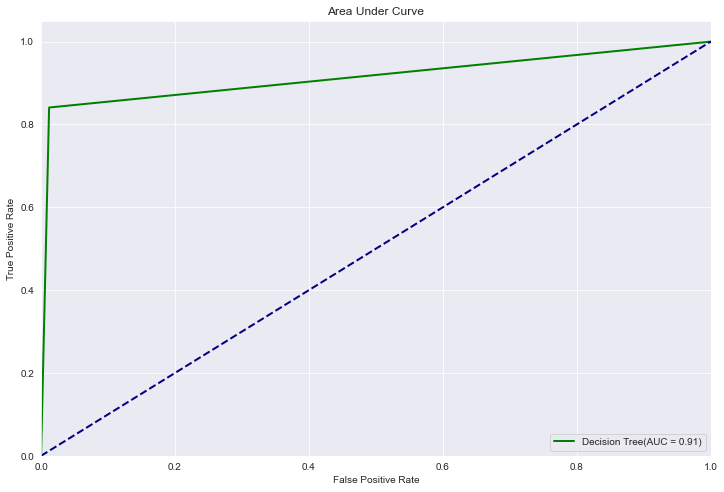

In [55]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix

In [60]:
print(confusion_matrix(y_test, predictions))

[[494   6]
 [ 14  74]]
